In [ ]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the data file to be used
df = pd.read_csv('/capstone project.csv')

In [ ]:
#overview of the data
df.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# converting column names to lower case and replacing unwanted spaces with '_'
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
#checking for column data types
print(df.dtypes)

show_id       object
type          object
title         object
director      object
country       object
date_added    object
rating        object
duration      object
listed_in     object
dtype: object


In [ ]:
#converting the 'title' column to capitalize
#df['title']
df.title = df.title.str.capitalize()
print(df.title)

0                   Dick johnson is dead
1                              Ganglands
2                          Midnight mass
3       Confessions of an invisible girl
4                                Sankofa
                      ...               
8785                          Yunus emre
8786                           Zak storm
8787                  Zindagi gulzar hai
8788                                Yoko
8789                                 Yom
Name: title, Length: 8790, dtype: object


In [ ]:
#replacing 'Not Given' with N/A in 'director' column
#df['director']
df.director = df.director.str.replace('Not Given','N/A')
print(df.director)

0       Kirsten Johnson
1       Julien Leclercq
2         Mike Flanagan
3         Bruno Garotti
4          Haile Gerima
             ...       
8785                N/A
8786                N/A
8787                N/A
8788                N/A
8789                N/A
Name: director, Length: 8790, dtype: object


In [ ]:
#replacing 'Us/US' with United States and 'PK' with UK in the country column
#df['country']
df.country = df.country.str.replace('Us','United States')
df.country = df.country.str.replace('PK','UK')
df.country = df.country.str.replace('US','United States')
print(df.country)

0       United States
1              France
2       United States
3              Brazil
4       United States
            ...      
8785           Turkey
8786    United States
8787         Pakistan
8788         Pakistan
8789         Pakistan
Name: country, Length: 8790, dtype: object


In [ ]:
# converting data type'date_added' from object to date_time and creating new columns year and year-month
df['date_added'] = df['date_added'].astype(str)
df['date_added'] = df['date_added'].str.replace(r'[\(\)]', '', regex=True).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
#df['year'] = df['year'].fillna(0).astype(int)
print(df.dtypes)
df.head()

show_id               object
type                  object
title                 object
director              object
country               object
date_added    datetime64[ns]
rating                object
duration              object
listed_in             object
dtype: object


,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,Dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
#converting seasons in duration column to minutes
season_to_minutes = 20 * 60
df['duration'] = df['duration'].astype(str)

def convert_duration(row):
    duration = row['duration']
    if 'season' in duration or (row['type'] == 'TV Show' and duration.isdigit() and int(duration) < 10):
        num_seasons = int(duration.split()[0])
        return num_seasons * season_to_minutes
    else:
        return int(duration.split()[0])

df['duration'] = df.apply(convert_duration, axis=1)
df.head()


,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,Dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125,"Dramas, Independent Movies, International Movies"


In [ ]:
#extracting year and year-month from date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year'] = df['date_added'].dt.year
df['year'] = df['year'].fillna(0).astype(int)
df['year_month'] = df['date_added'].dt.to_period('M')
df.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,year,year_month
0,s1,Movie,Dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90,Documentaries,2021,2021-09
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,2021-09
2,s6,TV Show,Midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",2021,2021-09
3,s14,Movie,Confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91,"Children & Family Movies, Comedies",2021,2021-09
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125,"Dramas, Independent Movies, International Movies",2021,2021-09


In [ ]:
df['director']

0       Kirsten Johnson
1       Julien Leclercq
2         Mike Flanagan
3         Bruno Garotti
4          Haile Gerima
             ...       
8785                N/A
8786                N/A
8787                N/A
8788                N/A
8789                N/A
Name: director, Length: 8790, dtype: object

In [ ]:
#finding the most popular director
#df[~df['director.value_counts'].isin(['N/A'])]
#~df['director'].isin(['N/A'])
# Get the most common director
df = df[~df['director'].isin(['N/A'])]
df = df.reset_index(drop=True)
#df['director'] = df['director'].str.split(',').explode().str.strip()
most_popular_director = df['director'].value_counts().idxmax()
most_popular_count = df['director'].value_counts().max()
print(f"The most popular director is: {most_popular_director} with {most_popular_count} titles.")


The most popular director is: Rajiv Chilaka with 20 titles.


In [ ]:
#finding the country that makes the most and least movies.(top5 and bottom 5)
df['country'] = df['country'].fillna('')
df['country'] = df['country'].str.split(',').explode().str.strip()
df = df[df['country'] != '']
country_counts = df['country'].value_counts()
top_5_countries = country_counts.head(5)
bottom_5_countries = country_counts.tail(5)

print(f"The top 5 countries that make the most movies are: {top_5_countries}")
print(f"\n And the bottom 5 countries that make the least movies are: {bottom_5_countries}")



The top 5 countries that make the most movies are: country
United States     2113
India              966
United Kingdom     373
Not Given          287
Canada             179
Name: count, dtype: int64

 And the bottom 5 countries that make the least movies are: country
Cameroon      1
Zimbabwe      1
Mozambique    1
Namibia       1
Croatia       1
Name: count, dtype: int64


Text(0, 0.5, 'Total Number of movies')

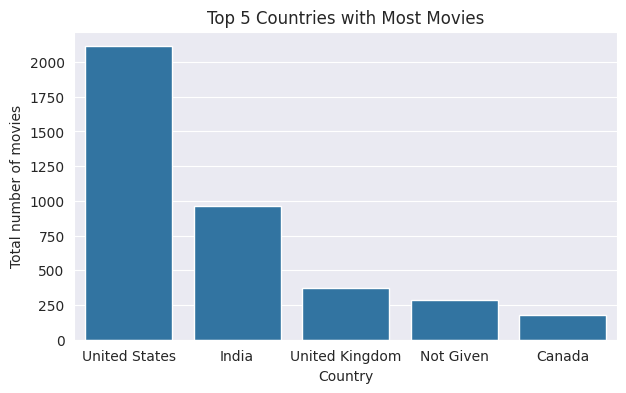

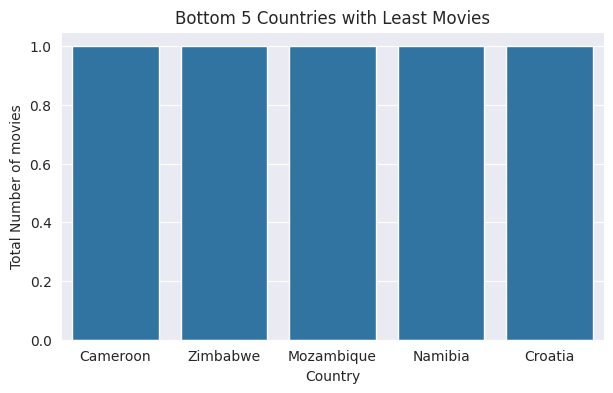

In [ ]:
# Converting the series to a DataFrame for visualization
top_5_df = top_5_countries.reset_index()
bottom_5_df = bottom_5_countries.reset_index()
top_5_df.columns = ['Country', 'Count']
bottom_5_df.columns = ['Country', 'Count']

sns.set_style('darkgrid')

plt.figure(figsize=(7, 4))
top_plot = sns.barplot(x='Country', y='Count', data=top_5_df)
top_plot.set_title('Top 5 Countries with Most Movies')
top_plot.set_xlabel('Country')
top_plot.set_ylabel('Total number of movies')

plt.figure(figsize=(7, 4))
bottom_plot = sns.barplot(x='Country', y='Count', data=bottom_5_df)
bottom_plot.set_title('Bottom 5 Countries with Least Movies')
bottom_plot.set_xlabel('Country')
bottom_plot.set_ylabel('Total Number of movies')

(array([2006., 2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022.]),
 [Text(2006.0, 0, '2006'),
  Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022')])

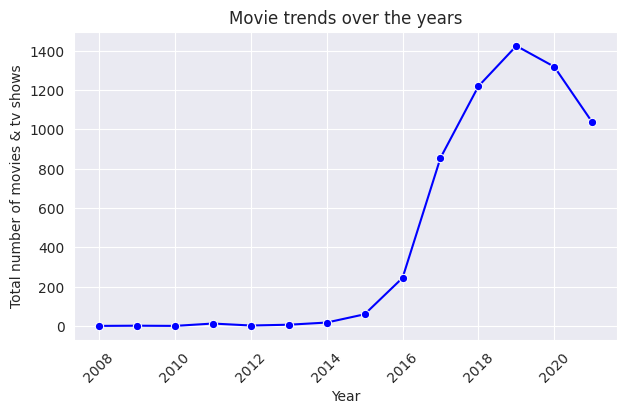

In [ ]:
# calculating the movie trends over the years

#df = df.dropna(subset=['year'])
yearly_counts = df['year'].value_counts().sort_index()
yearly_counts_df = yearly_counts.reset_index()
yearly_counts_df.columns = ['Year', 'Count']

sns.set_style('darkgrid')

plt.figure(figsize=(7, 4))
trend_plot = sns.lineplot(x='Year', y='Count', data=yearly_counts_df, marker='o', color='b')
trend_plot.set_title('Movie trends over the years')
trend_plot.set_xlabel('Year')
trend_plot.set_ylabel('Total number of movies & tv shows')
plt.xticks(rotation=45)

In [ ]:
# the most popular country genre-mix
df['listed_in'].str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,10
0,Documentaries,None,None,None,None,None,None,None,None,None,None
1,Crime,TV,"Shows,",International,TV,"Shows,",TV,Action,&,Adventure,None
2,TV,"Dramas,",TV,"Horror,",TV,Mysteries,None,None,None,None,None
3,Children,&,Family,"Movies,",Comedies,None,None,None,None,None,None
4,"Dramas,",Independent,"Movies,",International,Movies,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
6197,Children,&,Family,Movies,None,None,None,None,None,None,None
6198,Children,&,Family,Movies,None,None,None,None,None,None,None
6199,Kids',TV,None,None,None,None,None,None,None,None,None
6200,Documentaries,None,None,None,None,None,None,None,None,None,None


In [ ]:
# the most popular country genre-mix
from collections import Counter

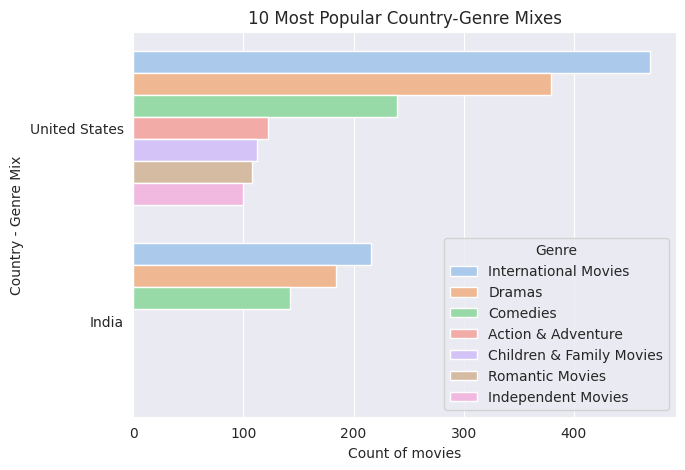

In [ ]:
# the most popular country genre-mix
df['country'] = df['country'].fillna('Unknown')
df['listed_in'] = df['listed_in'].fillna('Unknown')

df['country'] = df['country'].str.split(',').explode().str.strip().reset_index(drop=True)
df['listed_in'] = df['listed_in'].str.split(',').explode().str.strip().reset_index(drop=True)

df = df[(df['country'] != 'Unknown') & (df['listed_in'] != 'Unknown')]

country_genre_pairs = list(zip(df['country'], df['listed_in']))

country_genre_counts = Counter(country_genre_pairs)

most_common_combinations = country_genre_counts.most_common(10)

most_common_df = pd.DataFrame(most_common_combinations, columns=['Country-Genre Pair', 'Count'])

most_common_df[['Country', 'Genre']] = most_common_df['Country-Genre Pair'].apply(pd.Series)
most_common_df.drop(columns='Country-Genre Pair', inplace=True)

plt.figure(figsize=(7, 5))
mix_plot = sns.barplot(data=most_common_df, x='Count', y='Country', hue='Genre', palette='pastel')
mix_plot.set_title('10 Most Popular Country-Genre Mixes')
mix_plot.set_xlabel('Count of movies')
mix_plot.set_ylabel('Country - Genre Mix')
plt.legend(title='Genre')
sns.set_style('darkgrid')

Text(0, 0.5, 'Country')

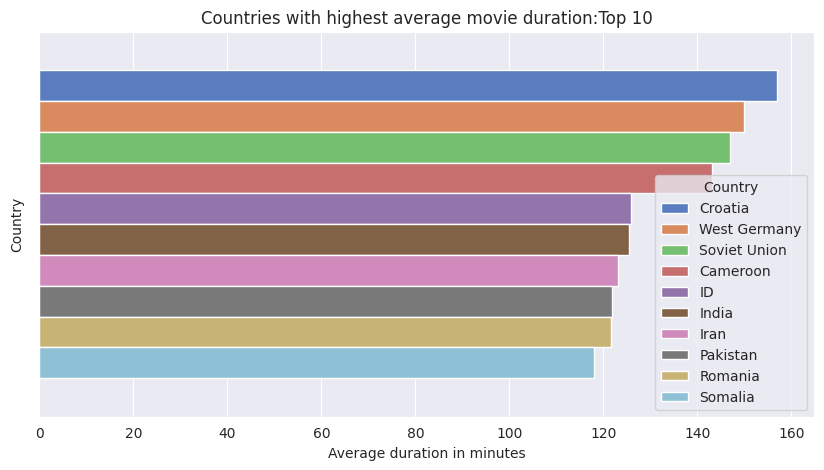

In [ ]:
# finding countries with highest average movie duration
movies_df = df[df['type'] == 'Movie']
average_duration_by_country = movies_df.groupby('country')['duration'].mean().sort_values(ascending=False).head(10).reset_index()
average_duration_by_country.columns = ['Country', 'Average Duration (minutes)']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(data=average_duration_by_country, x='Average Duration (minutes)', hue='Country', palette='muted')
plt.title('Countries with highest average movie duration:Top 10')
plt.xlabel('Average duration in minutes')
plt.ylabel('Country')